HNSC: number of sample is 497
HNSC: number of gene is 2777


<ipython-input-28-090b012938f9>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels


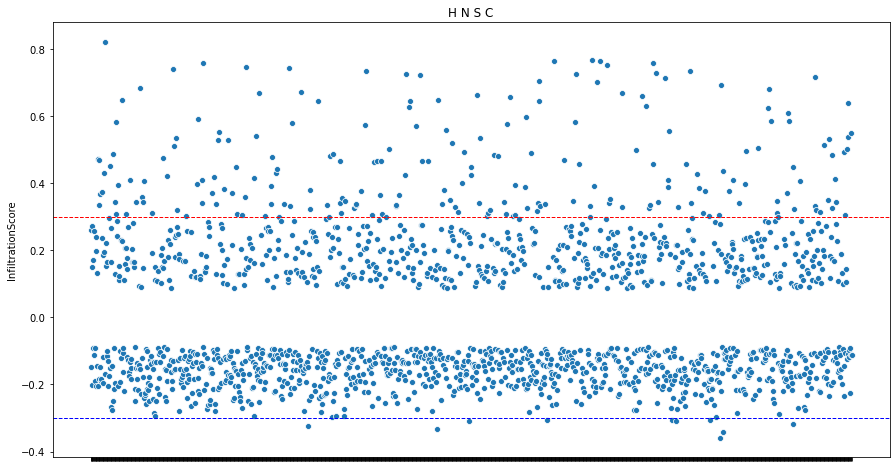

HNSC: Number of unGenes is 10
HNSC: Number of dpGenes is 31
PRAD: number of sample is 482
PRAD: number of gene is 1530


<ipython-input-28-090b012938f9>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels


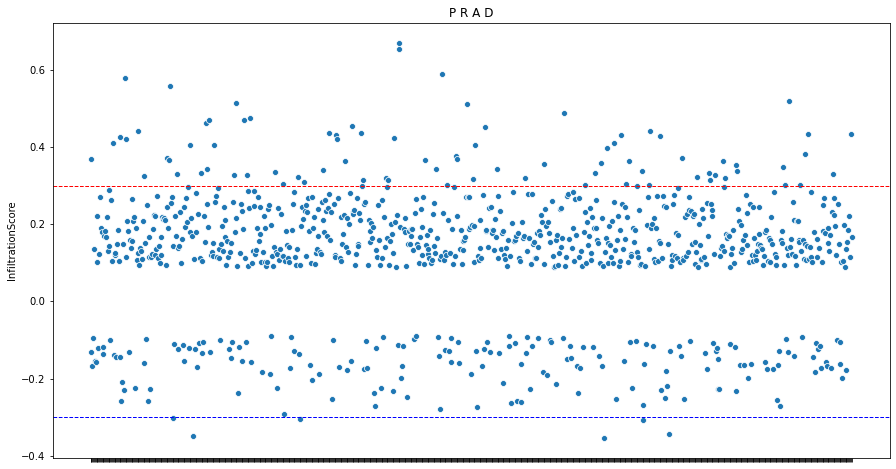

PRAD: Number of unGenes is 4
PRAD: Number of dpGenes is 50
LUAD: number of sample is 511
LUAD: number of gene is 2967


<ipython-input-28-090b012938f9>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels


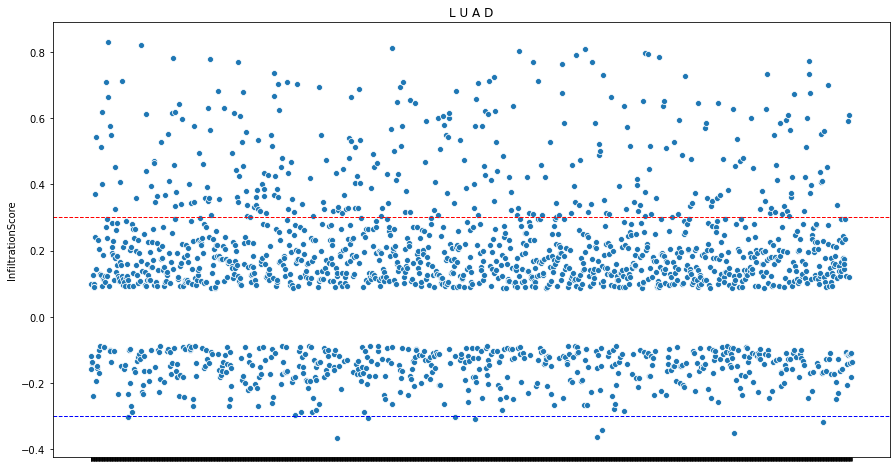

LUAD: Number of unGenes is 8
LUAD: Number of dpGenes is 312
BLCA: number of sample is 405
BLCA: number of gene is 2370


<ipython-input-28-090b012938f9>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels


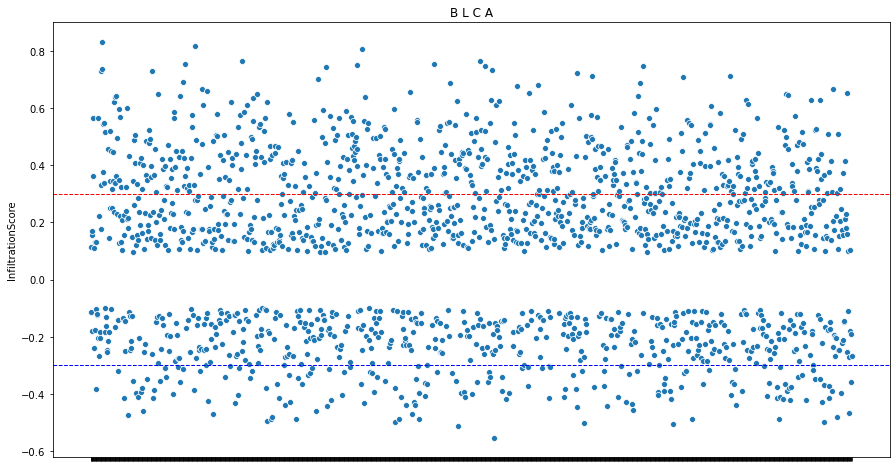

BLCA: Number of unGenes is 113
BLCA: Number of dpGenes is 482
COAD: number of sample is 284
COAD: number of gene is 3299


<ipython-input-28-090b012938f9>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels


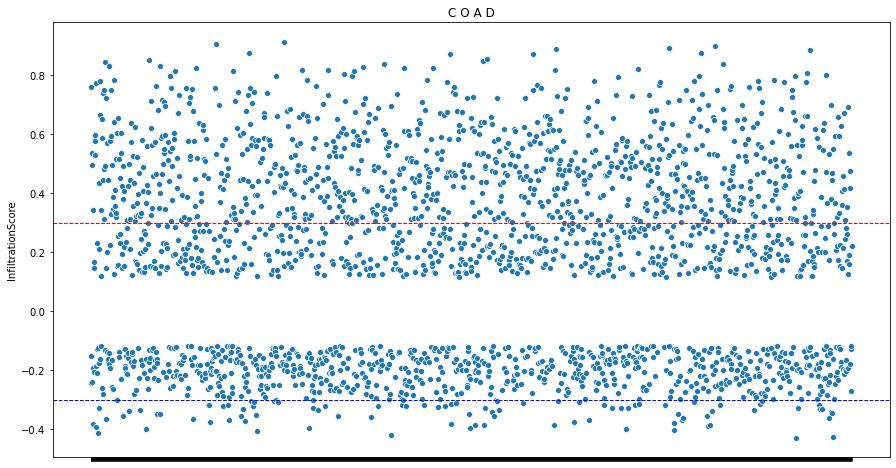

COAD: Number of unGenes is 83
COAD: Number of dpGenes is 792
LIHC: number of sample is 371
LIHC: number of gene is 3049


<ipython-input-28-090b012938f9>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels


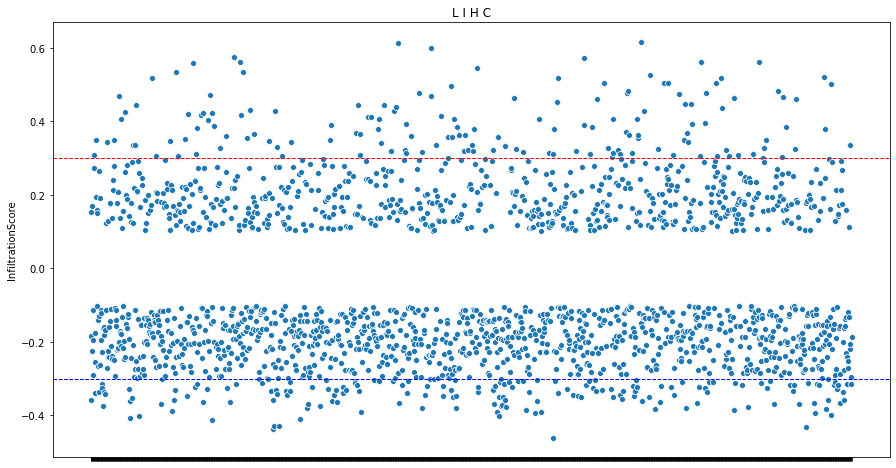

LIHC: Number of unGenes is 153
LIHC: Number of dpGenes is 116
BRCA: number of sample is 1079
BRCA: number of gene is 2887


<ipython-input-28-090b012938f9>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels


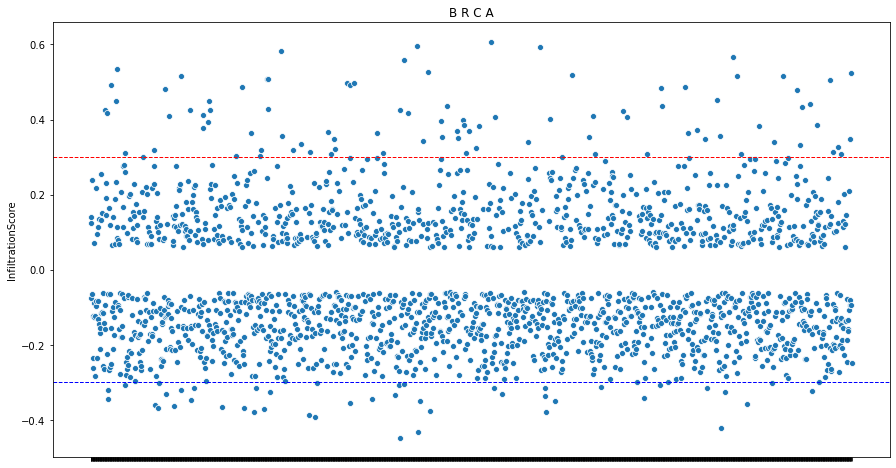

BRCA: Number of unGenes is 19
BRCA: Number of dpGenes is 54
KIRC: number of sample is 527
KIRC: number of gene is 3451


<ipython-input-28-090b012938f9>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels


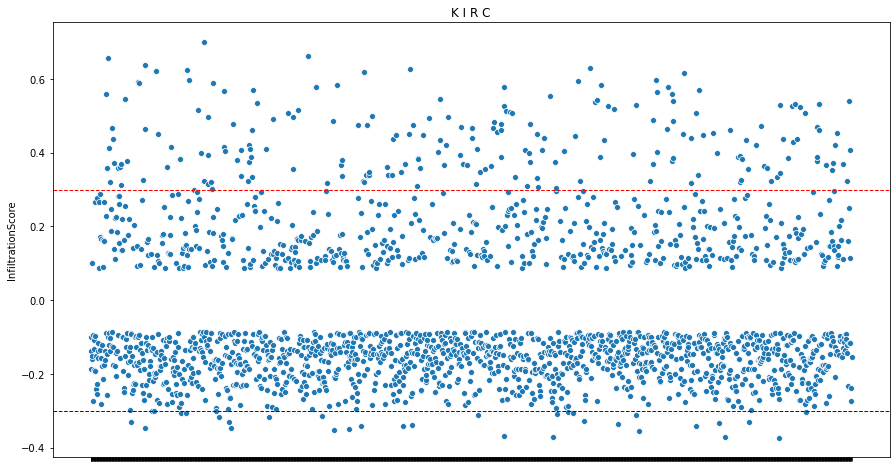

KIRC: Number of unGenes is 0
KIRC: Number of dpGenes is 12


In [28]:
import os
import numpy as np
import pandas as pd
import scipy.stats as ss
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import palettable
from matplotlib.gridspec import GridSpec

mix_path = r"./"
diff_path = r"./"
res_path = r'./output/'

# List all mix files
mix_files = [f for f in os.listdir(mix_path) if f.endswith('mixdata.csv')]

# Initialize an empty DataFrame to store the results
combined_rhoimm = pd.DataFrame()

# Store the paths of individual heatmap images
heatmap_images = []

# Process each mix file
for mixdata in mix_files:
    diff_files = [f for f in os.listdir(diff_path) if "sig" in f and mixdata[5:9] in f]

    if not diff_files:
        continue

    diffdata = diff_files[0]
    mixPath = os.path.join(mix_path, mixdata)
    diffPath = os.path.join(diff_path, diffdata)
    
    data = pd.read_csv(mixPath)
    TCGA_COAD_sigdiff = pd.read_csv(diffPath)
    print(mixdata[5:9] +': number of sample is ' + str(data.shape[0]))
    print(mixdata[5:9] +': number of gene is ' + str(data.shape[1]-25))
    
    # Calculate Spearman correlation
    rho, pval = ss.spearmanr(data)
    save_rho = pd.DataFrame(rho, columns=data.columns, index=data.columns)
    save_rho1 = save_rho.iloc[25:len(data.columns), 0:25]
    save_pval = pd.DataFrame(pval, columns=data.columns, index=data.columns)
    save_pval1 = save_pval.iloc[25:len(data.columns), 0:25]
    
    P = DataFrame(save_pval1['InfiltrationScore'])
    R = DataFrame(save_rho1['InfiltrationScore'])
    Infilt_p = pd.merge(R, P, on=R.index)
    Infilt_p.columns = ['Symbol', 'rho', 'pval']
    
    save_pval2 = save_pval1.copy()
    save_pval2[save_pval2 >= 0.05] = np.nan
    save_pval2[save_pval2 < 0.05] = 0
    save_rho_pval = save_rho1 + save_pval2
    # Replace np.nan with 'ns' in the resulting DataFrame or Series
    save_rho_pval1 = save_rho_pval.fillna('ns')
    # Save the results
    os.makedirs(res_path, exist_ok=True)
    save_rho_pval1.to_csv(os.path.join(res_path, mixdata[5:9] + "_save_rho_pval.csv"),index = True)

    # Create the plot
    f, ax = plt.subplots(figsize=(15, 8))
    sns.scatterplot(data=save_rho_pval, x=save_rho_pval.index, y='InfiltrationScore', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=1)# Set x-tick labels
    ax.axhline(0.3, color='red', linestyle='--', linewidth=1)  # Red dashed line at y=0.3
    ax.axhline(-0.3, color='blue', linestyle='--', linewidth=1)  # Blue dashed line at y=-0.3
    plt.title(' '.join(mixdata[5:9]))  # Make sure mixdata is indexed correctly for the title
    plt.show()
    
    geneinfo = pd.read_csv('/home/ziryu_wang/database/cMAP/geneinfo_beta.txt', sep='\t')
    TCGA_COAD_sigdiff = TCGA_COAD_sigdiff.rename(columns={"Unnamed: 0": "ensembl_id"})
    sig_gene = TCGA_COAD_sigdiff.loc[:, ["sig", "ensembl_id", 'gene_name']].merge(geneinfo.loc[:, ('gene_id', 'ensembl_id')])
    
    # Select upregulated negatively correlated genes (need to inhibit)
    nGenes = Infilt_p[(Infilt_p["rho"] <= -0.3) & (Infilt_p["pval"] < 0.05)]
    nGenes = nGenes.rename(columns={'Symbol': 'gene_name'})
    nGenes = sig_gene.merge(nGenes)
    unGenes = nGenes[nGenes['sig'] == 'up']
    print(mixdata[5:9] +': Number of unGenes is '+str(unGenes.shape[0]))
    #print(unGenes)
    # Select downregulated positively correlated genes (need to activate)
    pGenes = Infilt_p[(Infilt_p["rho"] >= 0.3) & (Infilt_p["pval"] < 0.05)]
    pGenes = pGenes.rename(columns={'Symbol': 'gene_name'})
    pGenes = sig_gene.merge(pGenes)
    dpGenes = pGenes[pGenes['sig'] == 'down']
    print(mixdata[5:9] +': Number of dpGenes is '+str(dpGenes.shape[0]))
    #print(dpGenes)
    # Save results
    dpGenes.to_csv(os.path.join(res_path, mixdata[5:9] + "_dpGenes1.csv"), index=False)
    unGenes.to_csv(os.path.join(res_path, mixdata[5:9] + "_unGenes4.csv"), index=False)
    Infilt_p.to_csv(os.path.join(res_path, mixdata[5:9] + "_Infilt_p.csv"), index=False)
    
    # Plot immune heatmap
    save_rhoimm = save_rho.iloc[0:25, 0:25]
    plt.figure(figsize=(4, 4), dpi=100)
    sns.heatmap(data=save_rhoimm, cmap=palettable.cmocean.diverging.Curl_10.mpl_colors, square=True, linewidths=0.1, linecolor='white', annot=False, fmt='.2g', cbar=False)
    plt.title(mixdata[5:9], fontsize=20)  # Add title with larger font size
    plt.xticks([])  # Hide x-axis labels
    plt.yticks([])  # Hide y-axis labels
    fig = plt.gcf()
    heatmap_image_path = os.path.join(res_path, mixdata[5:9] + "_immuAI_rho.png")
    fig.savefig(heatmap_image_path, dpi=150, bbox_inches='tight')
    heatmap_images.append(heatmap_image_path)
    plt.close()
    
    # Extract the 24th row of save_rhoimm and add it to the combined DataFrame
    extracted_row = save_rhoimm.iloc[24, :].rename(mixdata[5:9])
    combined_rhoimm = pd.concat([combined_rhoimm, extracted_row], axis=1)
    
    print('====================================================')


# Transpose the combined DataFrame to have the correct orientation
combined_rhoimm = combined_rhoimm.T

# Save the combined DataFrame to a CSV file
combined_rhoimm.to_csv(os.path.join(res_path, "combined_rhoimm.csv"))


In [4]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

try:
    import palettable
except ImportError:
    palettable = None

# Check versions
print(f"numPy v{np.__version__}")
print(f"pandas v{pd.__version__}")
print(f"matplotlib v{matplotlib.__version__}")
print(f"seaborn v{sns.__version__}")
print(f"palettable v{palettable.__version__}" if palettable else "Palettable is not installed.")


numPy v1.19.1
pandas v1.1.1
matplotlib v3.3.1
seaborn v0.10.1
palettable v3.3.0


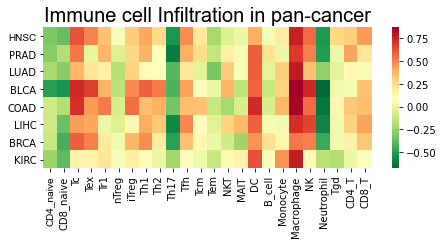

In [4]:
import matplotlib.font_manager as fm
# Path to Arial font file
font_path = '/home/ziryu_wang/jupyterpro/arial/ARIAL.TTF'  # Update this path
font_prop = fm.FontProperties(fname=font_path)

## Plot the heatmap of combined_rhoimm
plt.figure(figsize=(6.5, 3.5))
sns.heatmap(combined_rhoimm.iloc[:,0:24], cmap="RdYlGn_r", annot=False, fmt='.2g', cbar=True)
plt.title("Immune cell Infiltration in pan-cancer", fontsize=20, fontproperties=font_prop)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.yticks(rotation=0, fontproperties=font_prop)
plt.tight_layout()
plt.savefig(os.path.join(res_path, "combined_rhoimm_heatmap.pdf"), dpi=150, bbox_inches='tight')
plt.show()

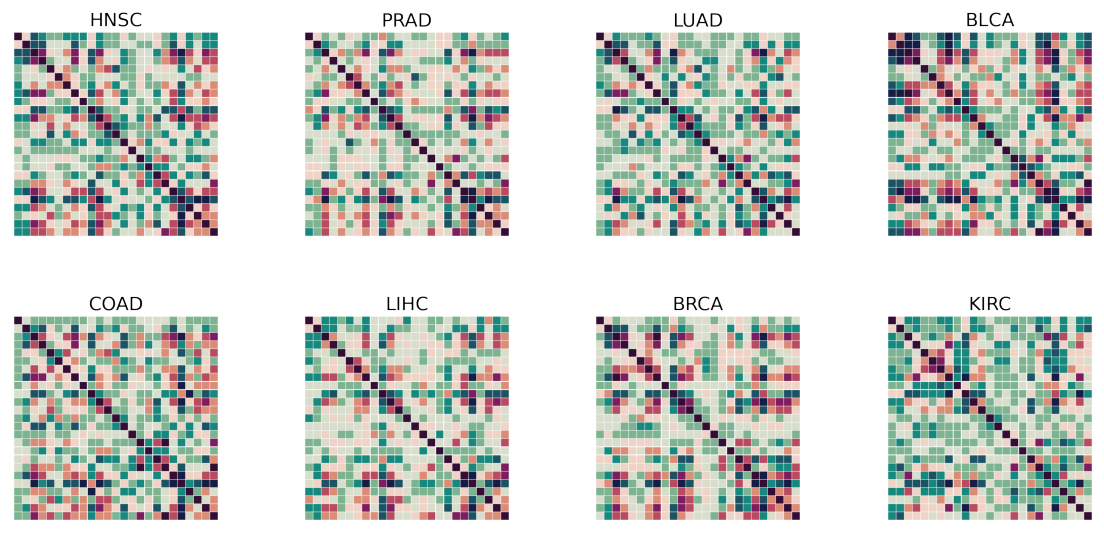

In [5]:
# Combine heatmap images into a single figure
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(4, 4, figure=fig)

for i, heatmap_image_path in enumerate(heatmap_images):
    if i >= 14:  # Limit to 8 images
        break
    img = plt.imread(heatmap_image_path)
    ax = fig.add_subplot(gs[i // 4, i % 4])
    ax.imshow(img)
    ax.axis('off')

combined_heatmap_path = os.path.join(res_path, "combined_immune_heatmap.pdf")
plt.savefig(combined_heatmap_path, dpi=150, bbox_inches='tight')
plt.show()
